## Impulse signal

An impulse signal is made up of a single sample value of 1 in an infinitely long stream of zeros. You can think about it as a burst of energy, which arrives very quickly, and which dissipates just as quickly.

<function matplotlib.pyplot.show(close=None, block=None)>

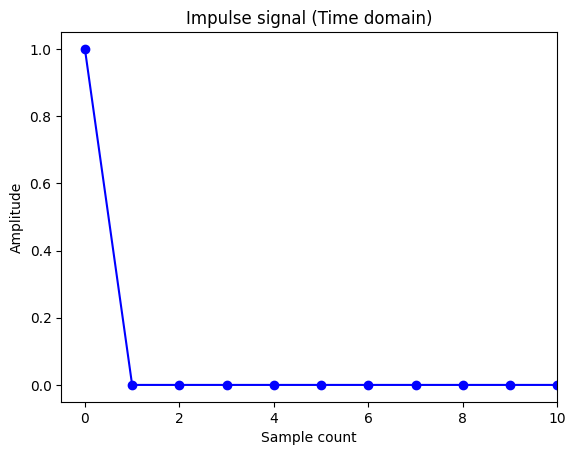

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science', 'notebook', 'grid'])

frameSize = 1024

impulse = np.zeros(frameSize)
impulse[0] = 1;

plt.plot(impulse, 'bo-')
plt.xlabel('Sample count')
plt.ylabel('Amplitude')
plt.xlim(-0.5, 10)
plt.title("Impulse signal (Time domain)")

plt.show

Let's listen to what the impulse signal sounds like

In [3]:
from IPython.display import Audio

sampleRate = 44100
audio = Audio(data=impulse, rate=sampleRate)
audio

### Frequency analysis of impulse signal

Performing Fourier analysis (FFT) we can see the frequency representation of the impulse signal which reveals that all represetnable frequencies are present within this impulse signal

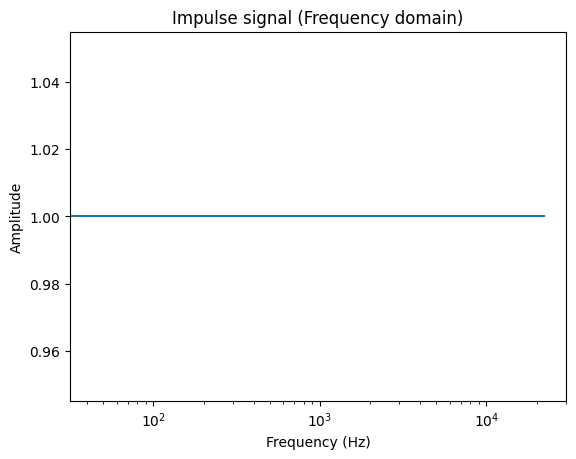

In [4]:
from scipy.fftpack import fft

spectrum = fft(impulse)

x = np.linspace(0, spectrum.size * sampleRate / frameSize / 2 , spectrum.size//2)
y = np.abs(spectrum)[:spectrum.size//2]
plt.plot(x, y)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Impulse signal (Frequency domain)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

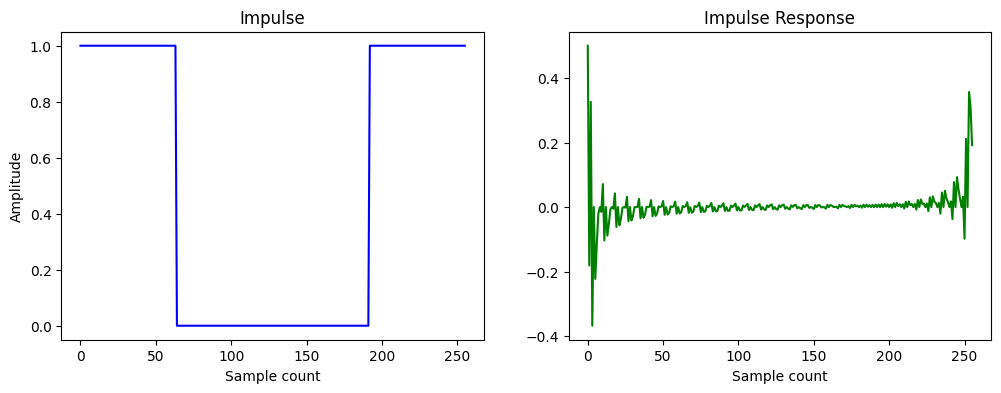

In [5]:
from scipy.fftpack import irfft

frameSize = 256

freqResponse = np.zeros(frameSize)
freqResponse[0:frameSize//4] = 1;
freqResponse[3*frameSize//4:frameSize] = 1;

timeResponse = irfft(freqResponse)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(freqResponse, 'b-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
#ax.set_ylim(-0.1, 1.1)
#ax.set_xlim(550, 560)
ax.set_title("Impulse")

ax = axes[1]
ax.plot(timeResponse, 'g-')
ax.set_xlabel('Sample count')
#ax.set_ylim(-1.1, 1.1)
#ax.set_xlim(1000, 1010)
ax.set_title("Impulse Response")

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

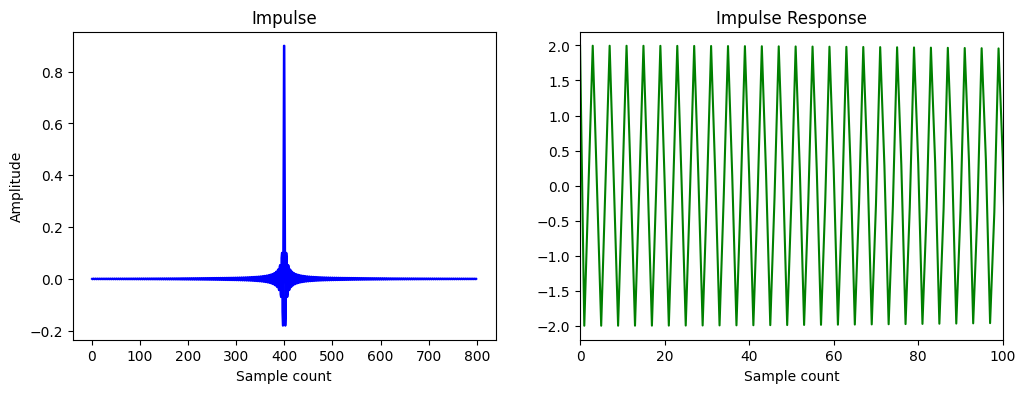

In [9]:
from scipy.fftpack import irfft, rfft

frameSize = 256

sinc = np.sinc(np.linspace(-200, 200, 800))
freqResponse = rfft(sinc)
#timeResponse = irfft(freqResponse)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(sinc, 'b-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
#ax.set_ylim(-0.1, 1.1)
#ax.set_xlim(550, 560)
ax.set_title("Impulse")

ax = axes[1]
ax.plot(freqResponse, 'g-')
ax.set_xlabel('Sample count')
#ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 100)
ax.set_title("Impulse Response")

plt.show
